In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [35]:
#load the data
uploaded = pd.read_csv(r"C:\Users\Acer\Desktop\Stock-MArket-Forecasting-master\coin_Dogecoin.csv")

In [36]:
#store the data in the data frame
df = pd.read_csv('coin_Dogecoin.csv')
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Dogecoin,DOGE,2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,0.0,1.509085e+06
1,2,Dogecoin,DOGE,2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,0.0,2.169688e+06
2,3,Dogecoin,DOGE,2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,0.0,3.188943e+06
3,4,Dogecoin,DOGE,2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,0.0,1.115034e+07
4,5,Dogecoin,DOGE,2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,0.0,7.284337e+06


In [37]:
#get  the no of trading days
df.shape

(2631, 10)

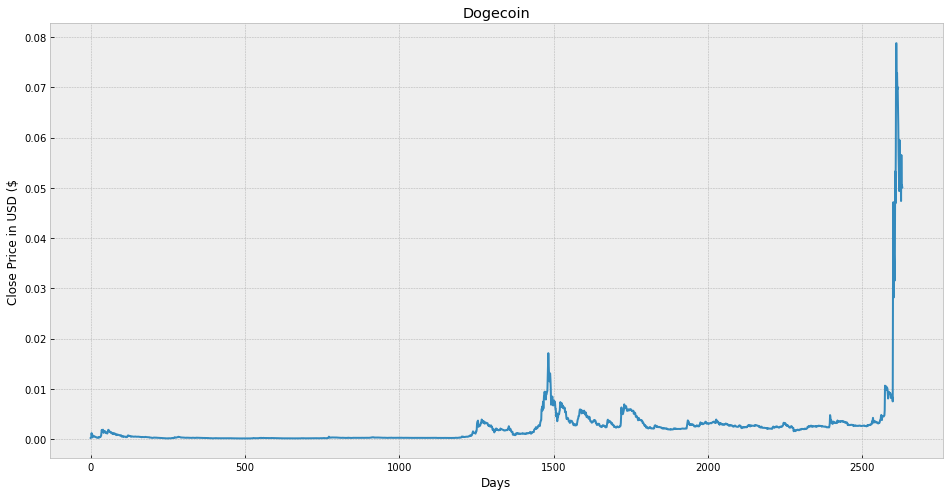

In [47]:
#visualize the close price data
plt.figure(figsize=(16,8))
plt.title('Dogecoin')
plt.xlabel('Days')
plt.ylabel('Close Price in USD ($')
plt.plot(df['Close'])
plt.show()

In [38]:
#get the close price
df = df[['Close']]
df.head(4)

,Close
0,0.000205
1,0.000269
2,0.000362
3,0.001162


In [39]:
#create a variable to predict 'x' days out into the future
future_days = 25
#create a new column (target) shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.head(4)

,Close,Prediction
0,0.000205,0.000373
1,0.000269,0.000356
2,0.000362,0.000345
3,0.001162,0.000278


In [40]:
#create the feature dataset (X) and convert it into a numpy arr and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[0.00020473]
 [0.00026854]
 [0.00036163]
 ...
 [0.03719621]
 [0.03487468]
 [0.03152025]]


In [41]:
#create the target data set (y) and convert it into numpy array and get the target values except the last 'x' rows
y = np.array(df['Prediction'])[:-future_days]
print(y)

[0.00037345 0.00035644 0.00034529 ... 0.05016734 0.05047986 0.0500829 ]


In [42]:
#split the data 75% training and 25% testing 
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

In [43]:
#create the models
#create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model 
lr = LinearRegression().fit(x_train, y_train)

In [29]:
#get the last 'x' rows of the feature dataset
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[40254.54649816],
       [38356.43950662],
       [35566.65594049],
       [33922.9605815 ],
       [37316.35939997],
       [39187.32812109],
       [36825.36585131],
       [36178.13890106],
       [35791.27792129],
       [36630.07568284],
       [36069.80639361],
       [35547.7508855 ],
       [30825.69850603],
       [33005.76356216],
       [32067.64288212],
       [32289.37808687],
       [32366.39304887],
       [32569.84955679],
       [30432.54707881],
       [33466.09635821],
       [34316.38765032],
       [34269.52154165],
       [33114.35774753],
       [33537.1768196 ],
       [35510.28903716]])

In [44]:
#show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[0.05016734 0.05016734 0.05016734 0.05016734 0.05016734 0.05016734
 0.05016734 0.05016734 0.05016734 0.05016734 0.05016734 0.05016734
 0.05016734 0.05016734 0.05016734 0.05016734 0.05016734 0.05016734
 0.05016734 0.05016734 0.05016734 0.05016734 0.05016734 0.05016734
 0.05016734]

[65547.06764047 62456.35219716 57913.70671417 55237.25346218
 60762.77451042 63809.30031012 59963.28251646 58909.39338409
 58279.46197879 59645.28867191 58732.9939739  57882.92333595
 50193.93621435 53743.76810815 52216.21245064 52577.26713549
 52702.67172727 53033.96294208 49553.76198124 54493.3347491
 55877.87652655 55801.56375467 53920.59361234 54609.07610653
 57821.92365906]


<ipython-input-48-e054305b6cf1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = predictions


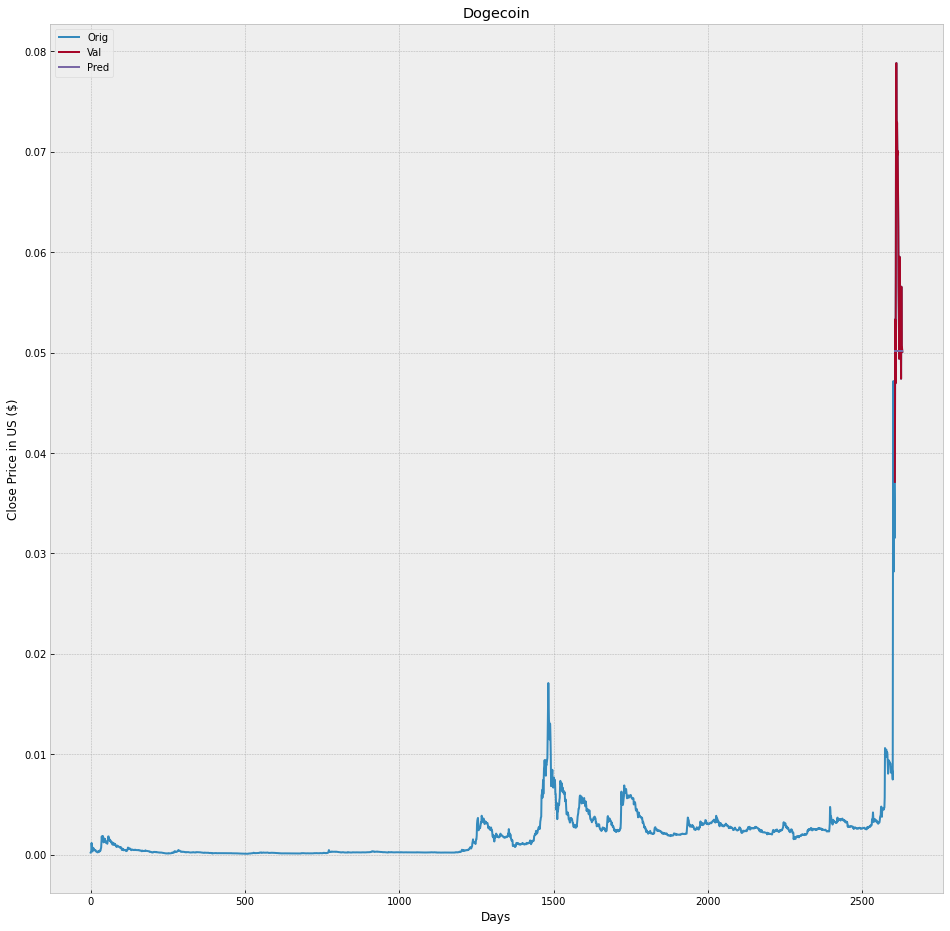

In [48]:
#visualize the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(16,16))
plt.title('Dogecoin')
plt.xlabel('Days')
plt.ylabel('Close Price in US ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Orig','Val', 'Pred'])
plt.show()